In [90]:

import numpy as np
from Problems.synthetic_cosh import synthetic
from analysis.analysis import error
from graph.graph import Random
from Optimizers import DOPTIMIZER as dopt
from utilities import utilities as ut
from utilities.plot_utils import plot_exp1
import matplotlib.pyplot as plt
import os
from matplotlib.font_manager import FontProperties
import matplotlib

matplotlib.rcParams['text.usetex'] = True
plt.rcParams['axes.linewidth'] = 2
plt.rcParams["font.family"] = "Arial"
plt.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'
plt.rcParams['pdf.fonttype'] = 42
font = FontProperties()
font.set_size(17)
mark_every = 50000
linewidth = 2

seed       = np.random.randint(12345)  
seed       = 45
np.random.seed(seed)

# Define different sets of parameters
# p1: max_computation
# p2: heterogeneity_constant
# p3: delay_type
# p4: min_delay
# p5: max_delay
# p6: expScale


param_sets = [
    {'p1': 1,   'p2': 0, 'p3': 0, 'p3': 'uniform', 'p4': 0, 'p5': 0,    'p6': 1}, ### 0  ### 0
    {'p1': 10,  'p2': 0, 'p3': 0, 'p3': 'uniform', 'p4': 0, 'p5': 0,    'p6': 1}, ### 1  ### 1
    {'p1': 10,  'p2': 2, 'p3': 0, 'p3': 'uniform', 'p4': 0, 'p5': 0,    'p6': 1}, ### 2  ### 2
    {'p1': 10,  'p2': 5, 'p3': 0, 'p3': 'uniform', 'p4': 0, 'p5': 0,    'p6': 1}, ### 3  ### 3

    {'p1': 1,   'p2': 0, 'p3': 0, 'p3': 'uniform', 'p4': 0, 'p5': 1,    'p6': 1}, ### 4  ### 4
    {'p1': 10,  'p2': 0, 'p3': 0, 'p3': 'uniform', 'p4': 0, 'p5': 1,    'p6': 1}, ### 5  ### 5
    {'p1': 10,  'p2': 2, 'p3': 0, 'p3': 'uniform', 'p4': 0, 'p5': 1,    'p6': 1}, ### 6  ### 6
    {'p1': 10,  'p2': 5, 'p3': 0, 'p3': 'uniform', 'p4': 0, 'p5': 1,    'p6': 1}, ### 7  ### 7

    {'p1': 1,   'p2': 0, 'p3': 0, 'p3': 'uniform', 'p4': 0, 'p5': 5,    'p6': 1}, ### 8   ### 8
    {'p1': 10,  'p2': 0, 'p3': 0, 'p3': 'uniform', 'p4': 0, 'p5': 5,    'p6': 1}, ### 9   ### 9
    {'p1': 10,  'p2': 2, 'p3': 0, 'p3': 'uniform', 'p4': 0, 'p5': 5,    'p6': 1}, ### 10  ### 10
    {'p1': 10,  'p2': 5, 'p3': 0, 'p3': 'uniform', 'p4': 0, 'p5': 5,    'p6': 1}, ### 11  ### 11

    {'p1': 1,   'p2': 0, 'p3': 0, 'p3': 'uniform', 'p4': 0, 'p5': 10,    'p6': 1}, ### 12  ### 12
    {'p1': 10,  'p2': 0, 'p3': 0, 'p3': 'uniform', 'p4': 0, 'p5': 10,    'p6': 1}, ### 13  ### 13
    {'p1': 10,  'p2': 2, 'p3': 0, 'p3': 'uniform', 'p4': 0, 'p5': 10,    'p6': 1}, ### 14  ### 14
    {'p1': 10,  'p2': 5, 'p3': 0, 'p3': 'uniform', 'p4': 0, 'p5': 10,    'p6': 1}, ### 15  ### 15

    {'p1': 1,   'p2': 0, 'p3': 0, 'p3': 'uniform', 'p4': 0, 'p5': 30,    'p6': 1}, ### 16  ### 16
    {'p1': 10,  'p2': 0, 'p3': 0, 'p3': 'uniform', 'p4': 0, 'p5': 30,    'p6': 1}, ### 17  ### 17
    {'p1': 10,  'p2': 2, 'p3': 0, 'p3': 'uniform', 'p4': 0, 'p5': 30,    'p6': 1}, ### 18  ### 18
    {'p1': 10,  'p2': 5, 'p3': 0, 'p3': 'uniform', 'p4': 0, 'p5': 30,    'p6': 1}, ### 19  ### 19
]

In [91]:
def exp1(params):

    #### create asynchronous setup 
    num_nodes  = 10
    dim        = 5
    comp_time_dist = 'random_uniform' 

    mincomp = 100*np.array([1,1,1,1,1,1,1,1,1,1])
        
    max_computation, heterogeneity_constant, delay_type, min_delay, max_delay, expScale = params['p1'], params['p2'], params['p3'], params['p4'], params['p5'], params['p6']
    maxcomp = max_computation + heterogeneity_constant * np.arange(1, num_nodes + 1)
     

    T_active_exp1, Tv_nodes_exp1, node_comp_time_exp1 = \
        ut.create_computation_time(num_nodes, max_iter=int(1e5), comp_time_dist=comp_time_dist, mean_comp=None,\
                                        min_comp=mincomp, max_comp=maxcomp, variance_comp=None, make_integer=True) 
                                           
    #### some parameters of the algorithms
    learning_rate    = 0.01
    max_iter_syn     = 20000
    max_iter_asyn    = 25000
    theta_0          = np.random.randn(num_nodes,dim)

    rho       = 0.01         
    alpha     = 0.1
    gamma     = 0.5
    eta       = 1.0

    #### Problem setup: parameters of the synthetic functions and constraints. 
    prd = synthetic(seed, num_nodes, dim)
    error_prd = error(prd,np.zeros(num_nodes),0)


    #### Create gossip matrices
    zero_row_sum,zero_col_sum,row_stochastic,col_stochastic, N_out, neighbors  = Random(num_nodes, prob=0.8, Laplacian_dividing_factor= 2).directed()


    #### Run the optimization algorithms and compute the performance metrics 
    x_dagp, _, _, _  = \
        dopt.DAGP(prd, zero_row_sum, zero_col_sum, learning_rate, max_iter_syn, \
                                theta_0, rho , alpha, cons = True)

    x_asy_dagp, _, _, _, _, Delay_mat_dagp = \
        dopt.Asy_DAGP(T_active_exp1, Tv_nodes_exp1, prd, zero_row_sum, zero_col_sum, learning_rate, max_iter_asyn, theta_0, num_nodes, dim, rho, alpha, gamma, eta, neighbors, \
                    cons = True, delay_type=delay_type, min_delay=min_delay, max_delay=max_delay, expScale_delay=expScale, \
                        drop_msg=False, drop_prob=0.)

    f_DAGP     = error_prd.cost_path(np.sum(x_dagp,      axis=1)/num_nodes) 
    f_asy_dagp = error_prd.cost_path(np.sum(x_asy_dagp,  axis=1)/num_nodes) 

    max_iter_syn_t = int(max_iter_syn/2)
    T_sync = np.zeros(max_iter_syn_t+1)
    for i in range(1,max_iter_syn_t+1):
        tmp1 = node_comp_time_exp1[:,i]
        tmp2 = np.multiply(neighbors, Delay_mat_dagp[:,:,i])
        tmp3 = np.max(tmp2, axis=0)
        tmp4 = tmp1 + tmp3 
        tmp5 = np.max(tmp4)
        T_sync[i] = T_sync[i-1] + tmp5

    return f_DAGP, f_asy_dagp, T_sync, T_active_exp1

In [ ]:
# Directory to save the output
output_dir = 'simulation_outputs_3'
os.makedirs(output_dir, exist_ok=True)

for i, params in enumerate(param_sets):
    # Run the algorithm
    f_DAGP, f_asy_dagp, T_sync, T_active_exp1 = exp1(params)
    
    # Save the arrays
    np.savez(os.path.join(output_dir, f'simulation_{i}.npz'), f_DAGP=f_DAGP, f_asy_dagp=f_asy_dagp, T_sync=T_sync, T_active_exp1=T_active_exp1)

    
    # Create and save the plot

print("Simulations complete. Output saved.")

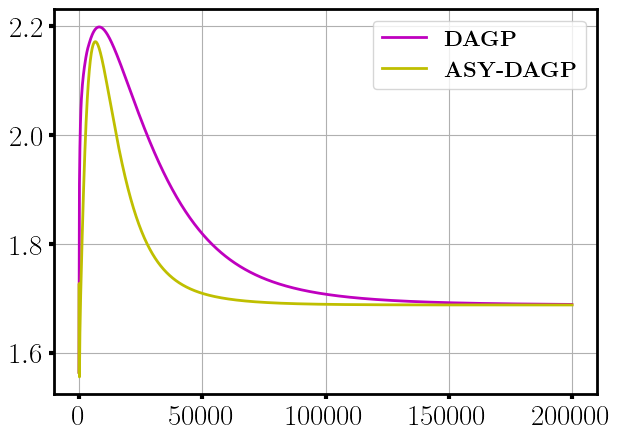

In [97]:
i,   syn_step , asy_step = 0,  1000, 2000
# i,   syn_step , asy_step = 1,  1000, 8000
# i,   syn_step , asy_step = 2,  1000, 16000
# i,   syn_step , asy_step = 3,  1000, 20000
# i,   syn_step , asy_step = 4,  1000, 1900
# i,   syn_step , asy_step = 5,  1000, 8700
# i,   syn_step , asy_step = 6,  1000, 15000
# i,   syn_step , asy_step = 7,  1000, 20000
# i,   syn_step , asy_step = 8,  1000, 5600
# i,   syn_step , asy_step = 9,  1000, 11500
# i,   syn_step , asy_step = 10, 1000, 17000
# i,   syn_step , asy_step = 11, 1000, 22000
# i,   syn_step , asy_step = 12, 1000, 10500
# i,   syn_step , asy_step = 13, 1000, 15200
# i,   syn_step , asy_step = 14, 1000, 19500
# i,   syn_step , asy_step = 15, 1000, 24300
# i,   syn_step , asy_step = 16, 1000, 25000
# i,   syn_step , asy_step = 17, 1000, 25000
# i,   syn_step , asy_step = 18, 1000, 25000
# i,   syn_step , asy_step = 19, 1000, 25000


matplotlib.rcParams['text.usetex'] = True
plt.rcParams['axes.linewidth'] = 2
plt.rcParams["font.family"] = "Arial"
plt.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'
plt.rcParams['pdf.fonttype'] = 42
font = FontProperties()
font.set_size(20)
mark_every = 50000
linewidth = 2

output_dir = 'simulation_outputs_3'
os.makedirs(output_dir, exist_ok=True)

data = np.load(f'simulation_outputs_3/simulation_{i}.npz')
f_DAGP = data['f_DAGP']
f_asy_dagp = data['f_asy_dagp']
T_sync = data['T_sync']
T_active_exp1 = data['T_active_exp1']

plt.figure(1, figsize=(7, 5))
plt.tick_params(axis='y', labelsize=21, width=3)
plt.tick_params(axis='x', labelsize=21, width=3)
plt.plot(T_sync[:syn_step], f_DAGP[:syn_step], '-m', markevery = 5000,linewidth = linewidth)
plt.plot(T_active_exp1[:asy_step], f_asy_dagp[:asy_step], '-y', markevery = 5000,linewidth = linewidth)
plt.legend([r'\textbf{DAGP}', r'\textbf{ASY-DAGP}'], prop={'size': 16})
# plt.xlabel(r'\textbf{Time units}', fontsize=16)
# plt.ylabel(r'\textbf{Objective value}', fontsize=16)
plt.grid(True)
path = os.path.join(output_dir, f'simulation_{i+44}')
plt.savefig( path + ".pdf", format = 'pdf')